Primeiras 5 linhas do DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies             

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_11596\2506467277.py:25: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title='Resultado', labels=['Não-Diabético', 'Diabético'])


Gráfico de dispersão salvo como 'glucose_bmi_outcome_scatter_plot.png'


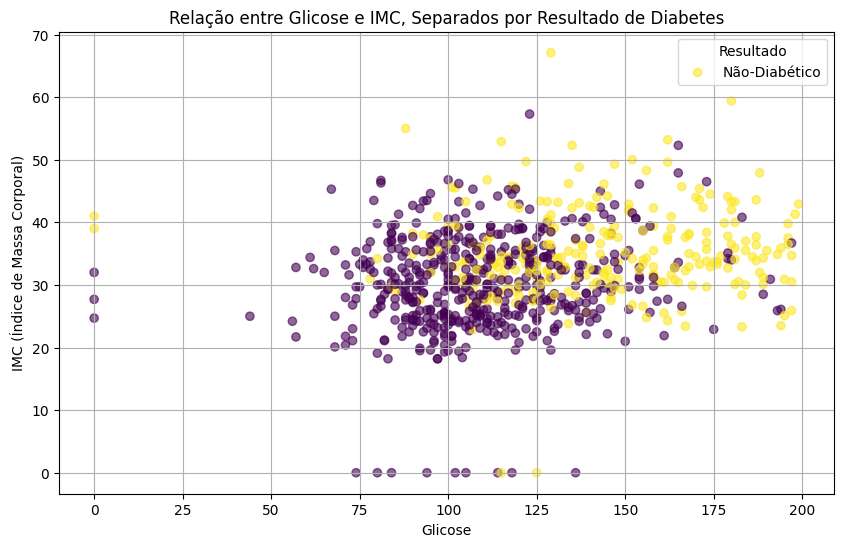

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega o arquivo CSV em um DataFrame do pandas
df = pd.read_csv('diabetes.csv')

# Exibe as primeiras 5 linhas do DataFrame
print("Primeiras 5 linhas do DataFrame:")
print(df.head())

# Exibe informações sobre o DataFrame (tipos de dados, contagem de valores nulos, etc.)
print("\nInformações do DataFrame:")
print(df.info())

# Exibe estatísticas descritivas das colunas numéricas
print("\nEstatísticas descritivas:")
print(df.describe())

# Cria um gráfico de dispersão de 'Glucose' vs 'BMI', colorido por 'Outcome'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='viridis', alpha=0.6)
plt.title('Relação entre Glicose e IMC, Separados por Resultado de Diabetes')
plt.xlabel('Glicose')
plt.ylabel('IMC (Índice de Massa Corporal)')
plt.legend(*scatter.legend_elements(), title='Resultado', labels=['Não-Diabético', 'Diabético'])
plt.grid(True)
plt.savefig('glucose_bmi_outcome_scatter_plot.png')

